<a href="https://colab.research.google.com/github/divyuk/machine-learning/blob/main/Linear%20Regression/Simple_Linear_regressor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df =pd.read_csv('/content/Advertising.csv')

So we have three feature but we are building simple linear regressor, hence we need to get rid of 2 feartures or we can combine those

In [29]:
df['total_spent'] = df['radio'] + df['newspaper'] + df['TV']
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


We will try to find the relation between total_spent and sales

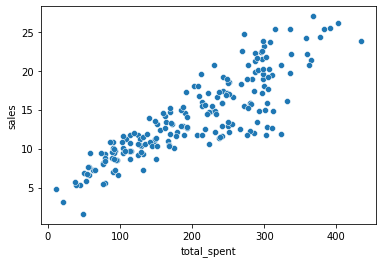

In [30]:
sns.scatterplot(data=df,x='total_spent',y='sales')

The trend seems to linear. A positive trend between the amount of sales done and the sales happened.

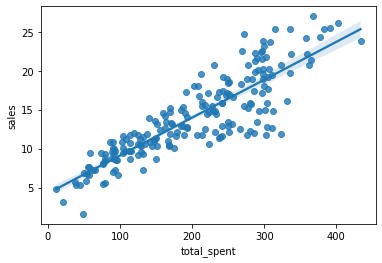

In [31]:
sns.regplot(data=df,x='total_spent',y='sales') #Since this is a simple linear regression, the seaborn plotted the best fit line using OLS

In [32]:
X = df['total_spent']
y = df['sales']

In [73]:
# help(np.polyfit) # y = mx + b --> polyfit will return coeff

In [34]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [35]:
potential_spent = np.linspace(0,500,100)

In [36]:
predicted_sales = 0.04868788 * potential_spent + 4.24302822

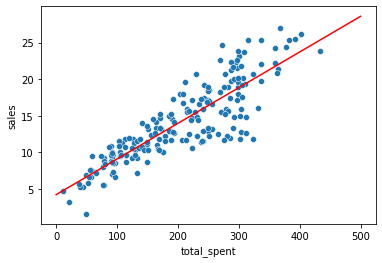

In [37]:
sns.scatterplot(data=df,x='total_spent',y='sales')
plt.plot(potential_spent , predicted_sales, color='red')

Creating the model from scratch

In [38]:
#1) The data set is loaded 
#2) Create the hypothesis
#3) Create Cost func
#4) Apply gradient 
#5) Min the gradient
#6) Return the coefficient values

In [53]:
x1 = X
y1 = y
arr = x1.values
# x1 = arr.reshape((200,1))
arr2 = y1.values
y1 = arr.reshape((200,1))
x1 = np.vstack( (np.ones(x1.shape[0]) , x1) ).T

In [54]:
x1.shape

(200, 2)

In [40]:
y1.shape

(200, 1)

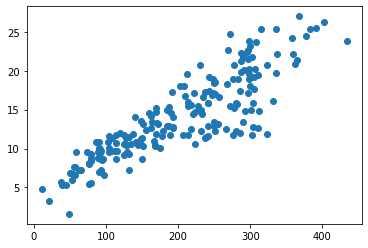

In [57]:
plt.scatter(x1[:, 1], y)
plt.show()

In [100]:
def model(X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.ones((2, 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
  return theta, cost_list

In [103]:
iteration = 2
learning_rate = 0.000005
theta, cost_list = model(x1, y1, learning_rate = learning_rate,iteration = iteration)

In [104]:
theta

array([[0.99999101],
       [0.99823719]])

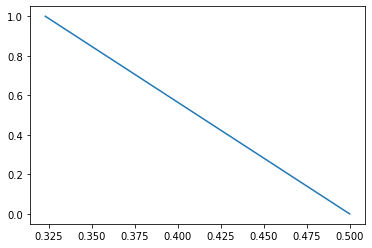

In [105]:
rng = np.arange(0, iteration)
plt.plot( cost_list,rng )
plt.show()

In [41]:
def h(beta):
  return np.matmul(beta,x1.T)

In [42]:
def cost_fun(beta):
  return (  ( h(beta) - y1).T @ (h(beta) - y1) )/2*y1.shape[0]

In [43]:
def gradient_descent(beta, learning_rate = 0.1 , epochs=10):

  m = y1.shape[0]

  cost = []

  for _ in range(epochs):
    hx = h(beta)
    grad = (1/m) * (x1.T @(hx-y1))
    beta = beta - learning_rate * grad
    cost.append(cost_fun(beta))

  return beta , cost

In [44]:
def plot_data(x, y):
	plt.xlabel('Total spent')
	plt.ylabel('sales')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

In [45]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

In [46]:
X.shape

(200,)

In [47]:
y.shape

(200,)

In [48]:
x1.shape

(200, 1)

In [55]:
beta = np.zeros((1, 2))
learning_rate = 0.1
num_epochs = 50
beta, J_all = gradient_descent( beta, learning_rate, num_epochs)
J = cost_fun(beta)
print("Cost: ", J)
print("Parameters: ", beta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

ValueError: ignored